# Mental Health Dataset Test

This notebook tests the download and loading of the Mental Health dataset from Kaggle.

In [1]:
%pip install kagglehub pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

# Download and copy to local directory
print("Downloading Mental Health dataset...")
cache_path = kagglehub.dataset_download("bhavikjikadara/mental-health-dataset")
current_dir = os.getcwd()
local_data_dir = current_dir
os.makedirs(local_data_dir, exist_ok=True)

for file in os.listdir(cache_path):
    src = os.path.join(cache_path, file)
    dst = os.path.join(local_data_dir, file)
    shutil.copy2(src, dst)
    print(f"Copied {file}")

path = local_data_dir

/home/tamim/ai4ph/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Copied Mental Health Dataset.csv


Dataset shape: (292364, 17)
Columns: ['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']
         Timestamp  Gender        Country Occupation self_employed  \
0  8/27/2014 11:29  Female  United States  Corporate           NaN   
1  8/27/2014 11:31  Female  United States  Corporate           NaN   
2  8/27/2014 11:32  Female  United States  Corporate           NaN   
3  8/27/2014 11:37  Female  United States  Corporate            No   
4  8/27/2014 11:43  Female  United States  Corporate            No   

  family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0             No       Yes    1-14 days            Yes             No   
1            Yes       Yes    1-14 days            Yes             No   
2            Yes       Yes    1-14 

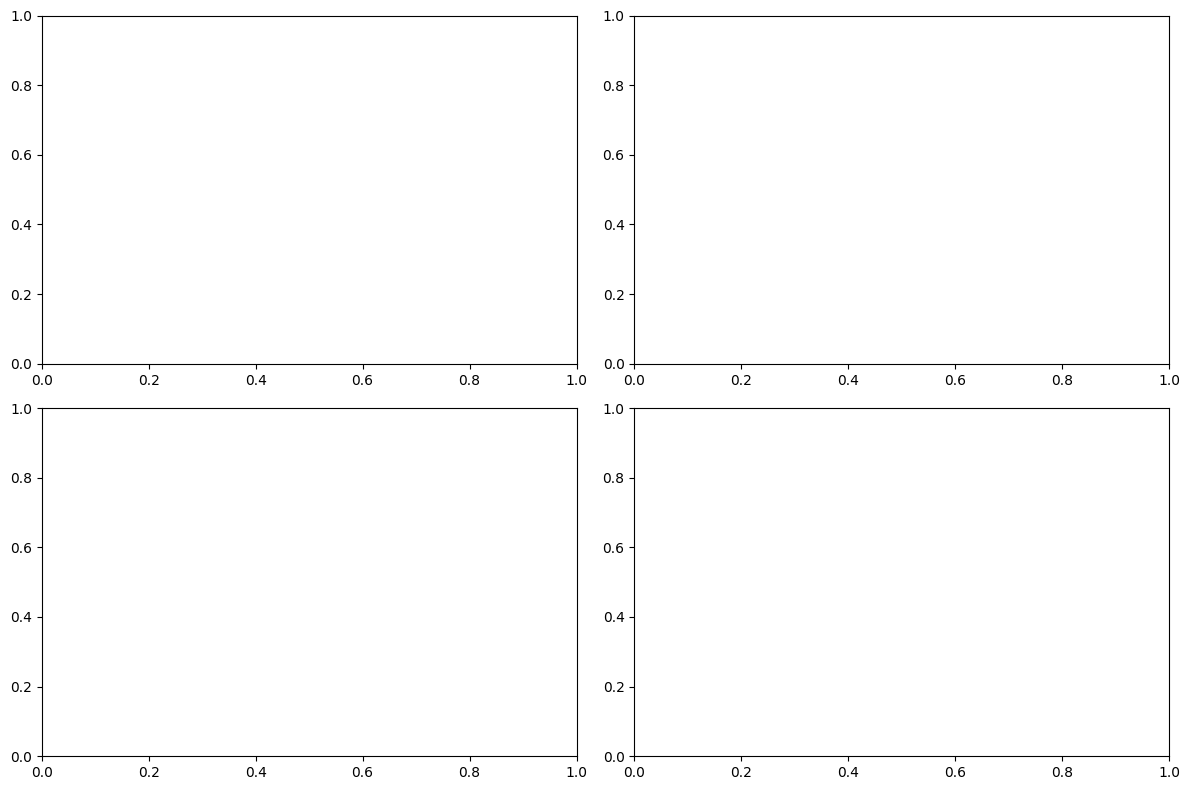

In [3]:
# Load and analyze
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    df = pd.read_csv(os.path.join(path, csv_files[0]))
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(df.head())
    
    # Create mental health visualizations
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.ravel()
    
    # Plot key mental health indicators
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for i, col in enumerate(numeric_cols[:4]):
        if i < len(axes):
            df[col].hist(bins=20, ax=axes[i])
            axes[i].set_title(f'{col} Distribution')
    
    plt.tight_layout()
    plt.show()

In [4]:
print("✅ Mental Health dataset ready!")
print(f"- Location: {path}")
if csv_files:
    print(f"- Records: {df.shape[0]:,}")
    print(f"- Features: {df.shape[1]}")
print("- Use case: Mental health analysis, psychological well-being research")
print("- Perfect for: Module 4 (Data Visualization), Module 5 (Machine Learning), Module 7 (Public Health Modeling)")

✅ Mental Health dataset ready!
- Location: /home/tamim/ai4ph/data/mental_health_analysis
- Records: 292,364
- Features: 17
- Use case: Mental health analysis, psychological well-being research
- Perfect for: Module 4 (Data Visualization), Module 5 (Machine Learning), Module 7 (Public Health Modeling)
